# Sentiment analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment, lemmatization
from textblob import TextBlob
from textblob import Word

## Load the data

In [2]:
debate_all = pd.read_pickle('data/all_for_sentiment.pkl')
debate_part = pd.read_pickle('data/all_part_for_sentiment.pkl')

In [3]:
debate_all

,transcript,lemat,full_name,colors
Biden_I,"How you doing, man? I’m well. Well, first of ...",man well well first thank looking forward pres...,Joe Biden,blue
Trump_I,"How are you doing? Thank you very much, Chris...",thank much chris tell simply election election...,Donald Trump,red
Biden_II,"220,000 Americans dead. You hear nothing else...",american dead hear nothing else say tonight he...,Joe Biden,blue
Trump_II,How are you doing? How are you? So as you kno...,know million people modeled expected die close...,Donald Trump,red
Biden,"How you doing, man? I’m well. Well, first of ...",man well well first thank looking forward pres...,Joe Biden,blue
Trump,"How are you doing? Thank you very much, Chris...",thank much chris tell simply election election...,Donald Trump,red


In [4]:
debate_part

,name,statement,debate,part,seconds,all_words,all_sentences,color
0,Chris Wallace,Good evening from the Health Education Campus ...,1,1,80.0,126,7,grey
1,Chris Wallace,This debate is being conducted under health an...,1,1,39.0,104,5,grey
2,Joe Biden,"How you doing, man?",1,1,2.0,4,1,blue
3,Donald Trump,How are you doing?,1,1,1.0,4,1,red
4,Joe Biden,I’m well.,1,1,20.0,4,1,blue
...,...,...,...,...,...,...,...,...
1297,Kristen Welker,"All right. Vice President Biden, same question...",2,2,8.0,25,2,grey
1298,Joe Biden,"I will say, I’m an American President. I repre...",2,2,22.0,87,6,blue
1299,Joe Biden,"We can grow this economy, we can deal with the...",2,2,34.0,115,8,blue
1300,Kristen Welker,"All right, I want to thank you both for a very...",2,2,23.0,66,7,grey


## Polarity and subjectivity

In [5]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

#### Transcryption

In [6]:
debate_all['polarity'] = debate_all['transcript'].apply(polarity)
debate_all['subjectivity'] = debate_all['transcript'].apply(subjectivity)

debate_all['color'] = ['blue','red','blue','red','blue','red']
debate_all

,transcript,lemat,full_name,colors,polarity,subjectivity,color
Biden_I,"How you doing, man? I’m well. Well, first of ...",man well well first thank looking forward pres...,Joe Biden,blue,0.114589,0.468325,blue
Trump_I,"How are you doing? Thank you very much, Chris...",thank much chris tell simply election election...,Donald Trump,red,0.074640,0.444264,red
Biden_II,"220,000 Americans dead. You hear nothing else...",american dead hear nothing else say tonight he...,Joe Biden,blue,0.107543,0.436381,blue
Trump_II,How are you doing? How are you? So as you kno...,know million people modeled expected die close...,Donald Trump,red,0.073086,0.461356,red
Biden,"How you doing, man? I’m well. Well, first of ...",man well well first thank looking forward pres...,Joe Biden,blue,0.111026,0.452174,blue
Trump,"How are you doing? Thank you very much, Chris...",thank much chris tell simply election election...,Donald Trump,red,0.073828,0.453191,red


In [8]:
full_names = ['Joe Biden\nDebate I', 'Donald Trump\nDebate I','Joe Biden\nDebate II', 'Donald Trump\nDebate II','Joe Biden\nAll', 'Donald Trump\nAll']

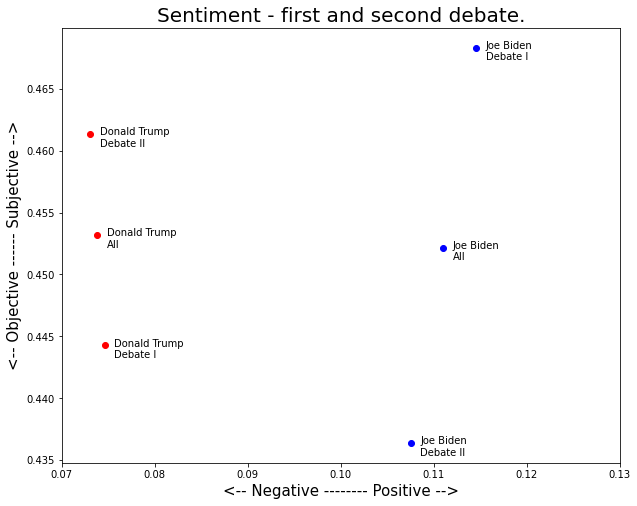

In [9]:
plt.rcParams['figure.figsize'] = [10, 8]

for index, candidate in enumerate(debate_all.index):
    x = debate_all.polarity.loc[candidate]
    y = debate_all.subjectivity.loc[candidate]
    plt.scatter(x, y, color=debate_all['color'][index])
    plt.text(x+.001, y-0.001, full_names[index], fontsize=10)
    plt.xlim(0.07,.13) 
    
plt.title('Sentiment - first and second debate.', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Objective ------ Subjective -->', fontsize=15)

plt.show()

#### Part of transcryption

In [10]:
debate_part['polarity'] = debate_part['statement'].apply(polarity)
debate_part['subjectivity'] = debate_part['statement'].apply(subjectivity)

debate_part

,name,statement,debate,part,seconds,all_words,all_sentences,color,polarity,subjectivity
0,Chris Wallace,Good evening from the Health Education Campus ...,1,1,80.0,126,7,grey,0.237500,0.383333
1,Chris Wallace,This debate is being conducted under health an...,1,1,39.0,104,5,grey,0.310119,0.568452
2,Joe Biden,"How you doing, man?",1,1,2.0,4,1,blue,0.000000,0.000000
3,Donald Trump,How are you doing?,1,1,1.0,4,1,red,0.000000,0.000000
4,Joe Biden,I’m well.,1,1,20.0,4,1,blue,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1297,Kristen Welker,"All right. Vice President Biden, same question...",2,2,8.0,25,2,grey,0.142857,0.330357
1298,Joe Biden,"I will say, I’m an American President. I repre...",2,2,22.0,87,6,blue,0.200000,0.637778
1299,Joe Biden,"We can grow this economy, we can deal with the...",2,2,34.0,115,8,blue,0.286147,0.573268
1300,Kristen Welker,"All right, I want to thank you both for a very...",2,2,23.0,66,7,grey,0.261905,0.435238


In [11]:
plt.rcParams['figure.figsize'] = [20, 6]

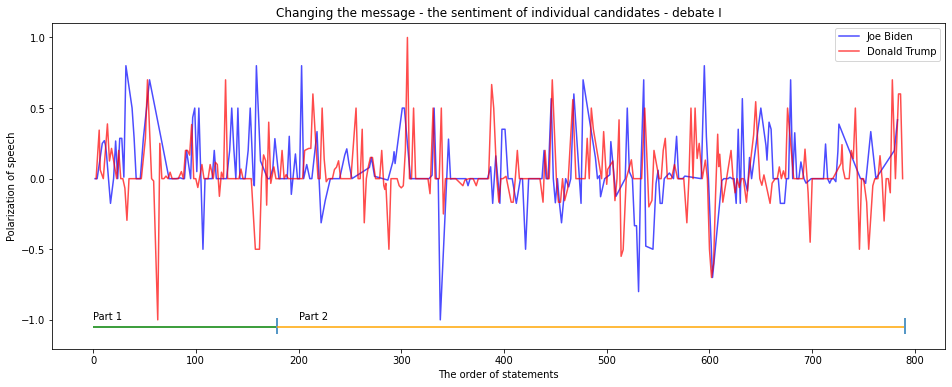

In [12]:
plt.rcParams['figure.figsize'] = [16, 6]
plt.plot(debate_part[(debate_part.name=='Joe Biden')&(debate_part.debate==1)]['polarity'], color='blue', alpha=.7)
plt.plot(debate_part[(debate_part.name=='Donald Trump')&(debate_part.debate==1)]['polarity'], color='red', alpha=.7)
plt.title('Changing the message - the sentiment of individual candidates - debate I')
plt.legend(['Joe Biden','Donald Trump'])
plt.hlines(-1.05,xmin=0,xmax=debate_part[(debate_part.debate==1)&(debate_part.part==1)].index.max(),colors='g')
plt.vlines(debate_part[(debate_part.debate==1)&(debate_part.part==2)].index.min(),ymin=-1.1,ymax=-.99)
plt.hlines(-1.05,xmin=debate_part[(debate_part.debate==1)&(debate_part.part==2)].index.min(),xmax=debate_part[(debate_part.debate==1)&(debate_part.part==2)].index.max(),colors='orange')
plt.vlines(debate_part[(debate_part.debate==2)&(debate_part.part==1)].index.min(),ymin=-1.1,ymax=-.99)
plt.text(0,-1,'Part 1')
plt.text(200,-1,'Part 2')
plt.xlabel('The order of statements')
plt.ylabel('Polarization of speech')
plt.show()

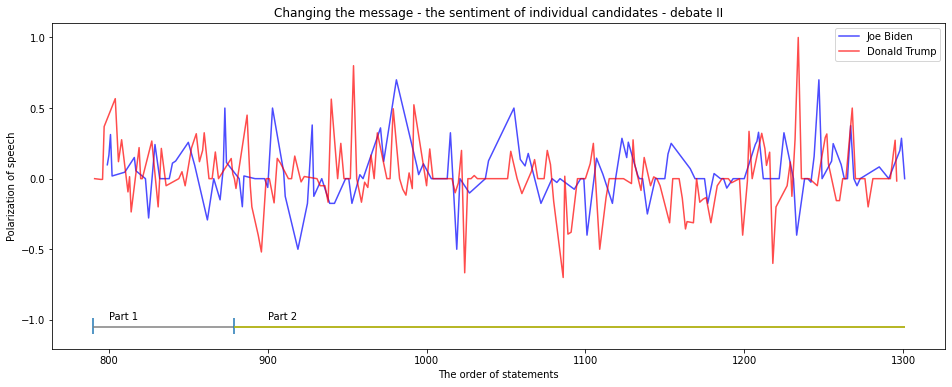

In [13]:
plt.rcParams['figure.figsize'] = [16, 6]
plt.plot(debate_part[(debate_part.name=='Joe Biden')&(debate_part.debate==2)]['polarity'], color='blue', alpha=.7)
plt.plot(debate_part[(debate_part.name=='Donald Trump')&(debate_part.debate==2)]['polarity'], color='red', alpha=.7)
plt.title('Changing the message - the sentiment of individual candidates - debate II')
plt.legend(['Joe Biden','Donald Trump'])
plt.vlines(debate_part[(debate_part.debate==2)&(debate_part.part==1)].index.min(),ymin=-1.1,ymax=-.99)
plt.hlines(-1.05,xmin=debate_part[(debate_part.debate==2)&(debate_part.part==1)].index.min(),xmax=debate_part[(debate_part.debate==2)&(debate_part.part==2)].index.max(),colors='grey')
plt.vlines(debate_part[(debate_part.debate==2)&(debate_part.part==2)].index.min(),ymin=-1.1,ymax=-.99)
plt.hlines(-1.05,xmin=debate_part[(debate_part.debate==2)&(debate_part.part==2)].index.min(),xmax=debate_part[(debate_part.debate==2)&(debate_part.part==2)].index.max(),colors='y')
plt.text(800,-1,'Part 1')
plt.text(900,-1,'Part 2')
plt.xlabel('The order of statements')
plt.ylabel('Polarization of speech')
plt.show()

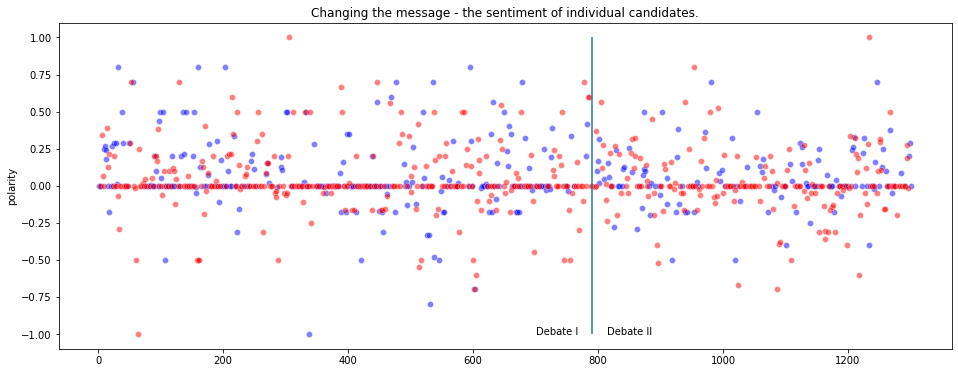

In [14]:
sns.scatterplot(x=debate_part[debate_part.name=='Joe Biden'].index ,y=debate_part[debate_part.name=='Joe Biden']['polarity'],alpha=.5, color='b')
sns.scatterplot(x=debate_part[debate_part.name=='Donald Trump'].index ,y=debate_part[debate_part.name=='Donald Trump']['polarity'],alpha=.5, color='r')
plt.text(700,-1,'Debate I')
plt.text(815,-1,'Debate II')
plt.vlines(debate_part[(debate_part.debate==2)&(debate_part.part==1)].index.min(),ymin=-1,ymax=1)
plt.title('Changing the message - the sentiment of individual candidates.')
plt.show()

In [15]:
debate_part[debate_part.name=='Joe Biden'].max()['statement']

'… with Mexico.'

In [16]:
debate_part[debate_part.name=='Joe Biden'].min()['statement']

' .'

In [17]:
debate_part[debate_part.name=='Donald Trump'].max()['statement']

'… with a billion dollars-'

In [18]:
debate_part[debate_part.name=='Donald Trump'].min()['statement']

'  I don’t know. Somebody went through Wall Street. You’re the one that takes all the money from Wall Street. I don’t take it.'